In [1]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy
import torch
import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten
import tensorflow as tf

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy.stats import mode
from collections import Counter

In [3]:
df_test = pd.read_csv("test.csv", header=None)
df_test = df_test.as_matrix()

In [4]:
def extract_features(data):
    train = []
    for sound in data:
#         features = []
        # mfcc
#         mfcc = librosa.feature.mfcc(sound, sr=SAMPLE_RATE, n_mfcc=20)
# #         mfcc = np.ravel(mfcc)
#         mfcc = np.mean(mfcc, axis=1)
# #         print (mfcc.shape)
#         features.extend(mfcc)
#         librosa.stft(sound)
#         # stft
#         stft = np.abs(librosa.core.stft(sound))
#         chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=SAMPLE_RATE),axis=1)
#         features.extend(chroma)
#         print(librosa.stft(sound, n_fft = 128, hop_length = 1024).shape)
        train.append(librosa.stft(sound, n_fft = 128, hop_length = 1024))
    train = np.array(train)
    print (train.shape)
    return train

In [5]:
filename = "train.csv"
nrows = 1000
full_train_set = np.empty((0,65,87))
full_val_set = np.empty((0,65,87))
y_train = np.empty(0)
y_val = np.empty(0)
n = 6325
for i in range(int(np.ceil(n / nrows))):
    df_train_sample = pd.read_csv(filename, header=None, skiprows = nrows * i, nrows = nrows)
    df_train_sample = df_train_sample.as_matrix()
    split = int(df_train_sample.shape[0] * .95)
    # print (split)
    train_set = df_train_sample[:split]
    val = df_train_sample[split:]
    
    X_train = train_set[:,:-1]
    Y_train = train_set[:,-1]

    X_val = val[:,:-1]
    Y_val = val[:,-1]
    
    full_train_set = np.concatenate(((extract_features(X_train), full_train_set)))
    full_val_set = np.concatenate(((extract_features(X_val), full_val_set)))
    y_train = np.concatenate(((np.array(Y_train)), y_train))
    y_val = np.concatenate(((np.array(Y_val)), y_val))

X_train = full_train_set.reshape(full_train_set.shape + (1,))
X_val = full_val_set.reshape(full_val_set.shape + (1,))
Y_train = y_train
Y_val = y_val

(950, 65, 87)
(50, 65, 87)
(950, 65, 87)
(50, 65, 87)
(950, 65, 87)
(50, 65, 87)
(950, 65, 87)
(50, 65, 87)
(950, 65, 87)
(50, 65, 87)
(950, 65, 87)
(50, 65, 87)
(308, 65, 87)
(17, 65, 87)


In [6]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(65,87,1),
                 activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
sess = tf.Session()
model_info = model.fit(X_train, tf.one_hot(Y_train, 10).eval(session=sess), batch_size = 32, epochs = 12, validation_data=(X_val, tf.one_hot(Y_val, 10).eval(session=sess)))

Train on 6008 samples, validate on 317 samples
Epoch 1/12


D:\anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


6008/6008 [==============================] - 33s 6ms/step - loss: 1.2882 - acc: 0.5576 - val_loss: 0.6972 - val_acc: 0.7855
Epoch 2/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.5272 - acc: 0.8296 - val_loss: 0.4293 - val_acc: 0.8707
Epoch 3/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.3547 - acc: 0.8835 - val_loss: 0.3855 - val_acc: 0.8454
Epoch 4/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.2528 - acc: 0.9161 - val_loss: 0.2480 - val_acc: 0.9306
Epoch 5/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.1990 - acc: 0.9376 - val_loss: 0.2487 - val_acc: 0.9148
Epoch 6/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.1589 - acc: 0.9482 - val_loss: 0.2295 - val_acc: 0.9338
Epoch 7/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.1406 - acc: 0.9561 - val_loss: 0.2068 - val_acc: 0.9306
Epoch 8/12
6008/6008 [==============================] - 24s 4ms/st

In [11]:
model_info = model.fit(X_train, tf.one_hot(Y_train, 10).eval(session=sess), batch_size = 32, epochs = 12, validation_data=(X_val, tf.one_hot(Y_val, 10).eval(session=sess)))

Train on 6008 samples, validate on 317 samples
Epoch 1/12
  32/6008 [..............................] - ETA: 29s - loss: 0.0074 - acc: 1.0000

D:\anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


6008/6008 [==============================] - 24s 4ms/step - loss: 0.0801 - acc: 0.9745 - val_loss: 0.1135 - val_acc: 0.9716
Epoch 2/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.0778 - acc: 0.9734 - val_loss: 0.1360 - val_acc: 0.9621
Epoch 3/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.0878 - acc: 0.9715 - val_loss: 0.1851 - val_acc: 0.9527
Epoch 4/12
6008/6008 [==============================] - 24s 4ms/step - loss: 0.0551 - acc: 0.9827 - val_loss: 0.1203 - val_acc: 0.9685
Epoch 5/12
 864/6008 [===>..........................] - ETA: 20s - loss: 0.0387 - acc: 0.9896

KeyboardInterrupt: 

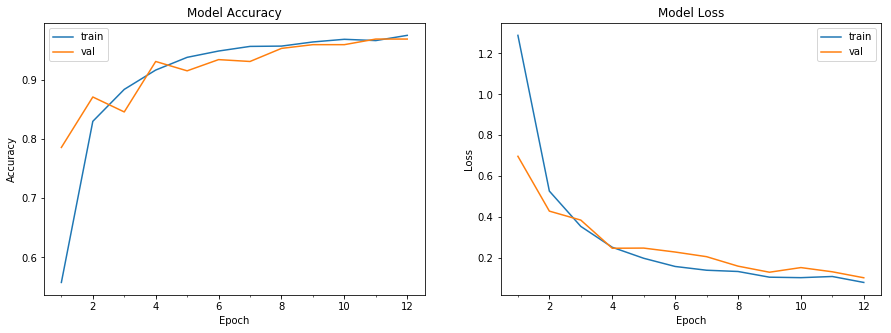

In [12]:
plot_model_history(model_info)

In [13]:
X_test = df_test[:,1:]
test = extract_features(X_test)

(1000, 65, 87)


In [14]:
test = test.reshape(test.shape + (1,))

In [15]:
preds = model.predict(test)

D:\anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [18]:
write_to_file("CNN_alldata.csv",preds.argmax(axis=1))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 1025, 173, 32)     320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1023, 171, 32)     9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 511, 85, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 511, 85, 32)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 511, 85, 64)       18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 509, 83, 64)       36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 254, 41, 64)       0         
__________

In [10]:
# """
# Read in train and test as Pandas DataFrames
# """
# nrows = 2000
# df_train = pd.read_csv("train.csv", nrows = nrows, header=None)

# # later on, we can process chunks using chunkiter
# df_train = df_train.as_matrix()

In [11]:
df_test.shape

(1000, 88201)

In [12]:
# # df_test.head()
# split = int(nrows * 0.8)
# # print (split)
# train_set = df_train[:split]
# val = df_train[split:]

# print (train_set.shape)
# print (val.shape)

(1600, 88201)
(400, 88201)


In [13]:
def acc(preds, t_validate):
    return np.sum(preds == np.array(t_validate)) / len(preds)

# X_train = train_set[:,:-1]
# Y_train = train_set[:,-1]

# X_val = val[:,:-1]
# Y_val = val[:,-1]

# X_test = df_test[:,1:]

In [14]:
# a sample - extracting MFCC from the first audio file
SAMPLE_RATE = 22050
feats = extract_features(X_train[0:2])
print (feats.shape)
print (feats)
# librosa.display.specshow(feats, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()

(2, 20)
(2, 20)
[[-9.14263431e+01  1.25182869e+02 -2.20177046e+01  4.34730615e+01
  -1.32595583e+01  1.15865899e+00  1.26806292e+01  3.20957989e+00
   3.64353469e+00  7.09099471e+00 -9.04655298e+00  1.32091604e+01
  -7.56609499e-01  5.72818423e+00 -1.81973900e+00  6.48612086e+00
  -7.68844657e+00  1.78348467e+00 -3.49108957e+00  4.09210852e-01]
 [-7.72972228e+02  4.78841074e+01  4.46203627e+01  4.27198764e+01
   4.12014343e+01  3.91010159e+01  3.67176536e+01  3.40757748e+01
   3.11813277e+01  2.81209052e+01  2.48825346e+01  2.15659860e+01
   1.82113725e+01  1.48406743e+01  1.15404973e+01  8.33154362e+00
   5.25950452e+00  2.36863625e+00 -3.34830550e-01 -2.80540437e+00]]


In [176]:
# train = extract_features(X_train)
# validation = extract_features(X_val) 
test = extract_features(X_test)

(1000, 30)


In [177]:
print (train.shape)
print ("learning...")
clf = RandomForestClassifier()
clf.fit(train, Y_train)

(5060, 30)
learning...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [178]:
log_clf = LogisticRegression()
log_clf.fit(train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [180]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(2000))
mlp_clf.fit(train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2000, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [181]:
rf_pred = clf.predict(validation)
# print (rf_pred)
print ("rf acc: ", acc(rf_pred, Y_val))

log_pred = log_clf.predict(validation)
# print (log_pred)
print ("log acc: ", acc(log_pred, Y_val))

gb_pred = gb_clf.predict(validation)
print ("gb acc: ", acc(gb_pred, Y_val))

mlp_pred = mlp_clf.predict(validation)
print ("mlp acc: ", acc(mlp_pred, Y_val))

rf acc:  0.18972332015810275
log acc:  0.2616600790513834
gb acc:  0.2339920948616601
mlp acc:  0.19525691699604744


In [183]:
# pick plurality vote among multiple predictors
def ensemble_pred(preds):
    return mode(preds)[0][0]

ensemble = np.array([rf_pred, log_pred, gb_pred, mlp_pred])
en_pred = ensemble_pred(ensemble)
print ("ens acc: ", acc(en_pred, Y_val))

ens acc:  0.2592885375494071


In [8]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [142]:
model = keras.Sequential()
model.add(Dense(2000, input_shape=(20,)))
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

In [143]:
train.shape

(5060, 20)

In [144]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model_info = model.fit(train, tf.one_hot(Y_train, 10).eval(session=sess), batch_size = 256, epochs = 30, validation_data=(validation, tf.one_hot(Y_val, 10).eval(session=sess)))

Train on 5060 samples, validate on 1265 samples
Epoch 1/30
5060/5060 [==============================] - 2s 451us/step - loss: 11.5144 - acc: 0.2336 - val_loss: 11.4300 - val_acc: 0.2379
Epoch 2/30
5060/5060 [==============================] - 0s 33us/step - loss: 11.3770 - acc: 0.2336 - val_loss: 11.5584 - val_acc: 0.2632
Epoch 3/30
5060/5060 [==============================] - 0s 41us/step - loss: 11.4725 - acc: 0.2575 - val_loss: 11.7586 - val_acc: 0.2664
Epoch 4/30
5060/5060 [==============================] - 0s 32us/step - loss: 11.4884 - acc: 0.2692 - val_loss: 11.7972 - val_acc: 0.2664
Epoch 5/30
5060/5060 [==============================] - 0s 28us/step - loss: 11.5419 - acc: 0.2733 - val_loss: 11.6124 - val_acc: 0.2458
Epoch 6/30
5060/5060 [==============================] - 0s 28us/step - loss: 11.5434 - acc: 0.2549 - val_loss: 11.7989 - val_acc: 0.2609
Epoch 7/30
5060/5060 [==============================] - 0s 29us/step - loss: 11.5394 - acc: 0.2664 - val_loss: 11.8782 - val_acc:

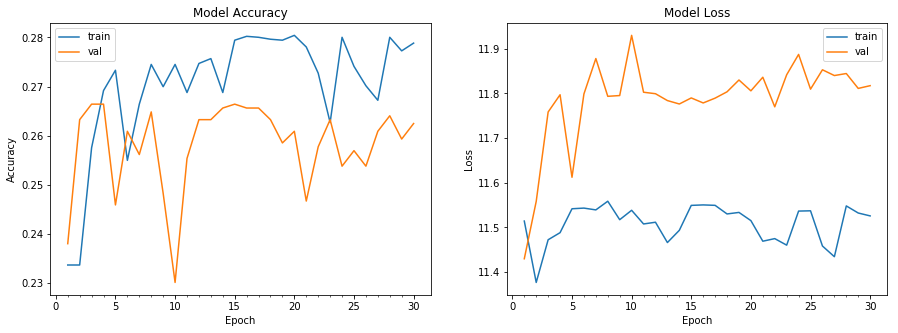

In [145]:
plot_model_history(model_info)

In [17]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i) + "," + str(int(p)) + "\n")

In [97]:
# trying to predict on the test set
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i) + "," + str(int(p)) + "\n")

log_preds_f = log_clf.predict(test)
rf_preds_f = clf.predict(test)
mlp_preds_f = mlp_clf.predict(test)
gb_preds_f = gb_clf.predict(test)

ensemble = np.array([rf_preds_f, log_preds_f, gb_preds_f, mlp_preds_f])
en_preds_f = ensemble_pred(ensemble)
write_to_file("pred.csv", en_preds_f)

In [98]:
print (X_test.shape)
testing = (np.sum(X_test, axis=1))
zeroes = np.where(testing == 0)[0]
# print (testing)
# print (log_preds_f[zeroes])
# print (rf_preds_f[zeroes])
print (en_preds_f[zeroes])
# en_preds_f[zeroes] = 7
# print (en_preds_f[zeroes])

print (Counter(en_preds_f))

(1000, 88200)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
Counter({0.0: 978, 3.0: 10, 5.0: 4, 4.0: 2, 7.0: 2, 9.0: 2, 8.0: 1, 2.0: 1})


# Listening to the audio
This code enables you to listen to a sample sine wave audio.

In [12]:
SAMPLE_RATE = 22050

librosa.feature.mfcc(df_train, 

In [22]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)
ipd.Audio(signal, rate=SAMPLE_RATE)

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [23]:
# Just some re-shaping and dimension finding
N = 1
print ("N:",N)
train = signal[np.newaxis,:]
print ("Train shape",train.shape)
N_train = train.shape[0]
NUM_SAMPLES = train.shape[1]-1

X_train = train[:,:-1]
y_train = train[:,-1]
y_train = y_train.reshape(N_train,1)

N: 1
Train shape (1, 88200)


In [24]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [25]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [26]:
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print (test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168, 173)


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [27]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
#np.save('Data/xtrain_spec', tmp_train)

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


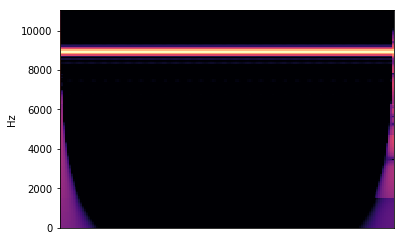

In [28]:
librosa.display.specshow(tmp_train[0], y_axis='hz')

In [21]:
print (tmp_train.shape)

(1, 168, 173)
